In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.classes.action_tests import ActionTest
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.specific.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.specific.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.reports.specific.seduce import first_flirt_timing
from triple_agent.constants.events import SCL5_PICK_MODES, SCL5_VENUE_MODES, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.specific.mission_progress import mission_progress
from triple_agent.reports.specific.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.classes.roles import Roles
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins

In [4]:
division = 'Copper'

In [5]:
div_replays = get_parsed_replays(lambda g: g.division == division and g.event == 'SCL5' and g.spy not in SCL5_DROPPED_PLAYERS and g.sniper not in SCL5_DROPPED_PLAYERS)

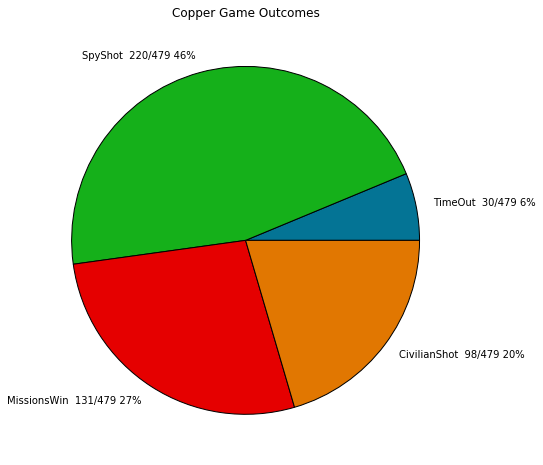

In [6]:
game_outcomes(div_replays, f"{division} Game Outcomes")

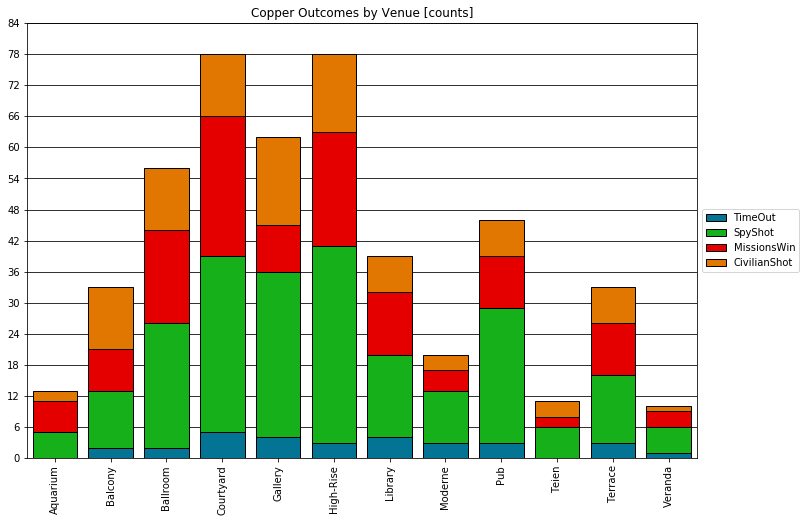

In [7]:
game_outcomes(div_replays, f"{division} Outcomes by Venue", groupby=lambda g: g.venue, percentile_plot=False)

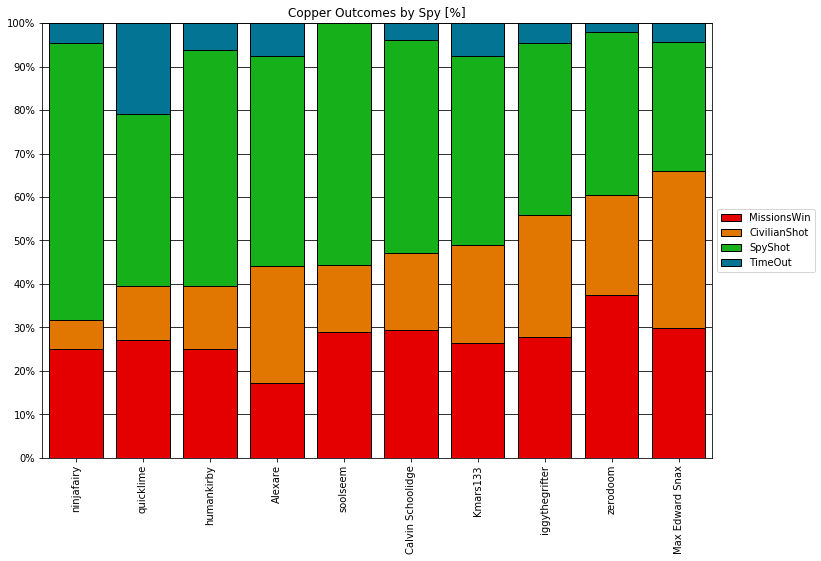

In [8]:
game_outcomes(
    div_replays,
    f"{division} Outcomes by Spy",
    groupby=lambda g: g.spy,
    counts_plot=False,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    category_data_order=sort_by_spy_wins
)

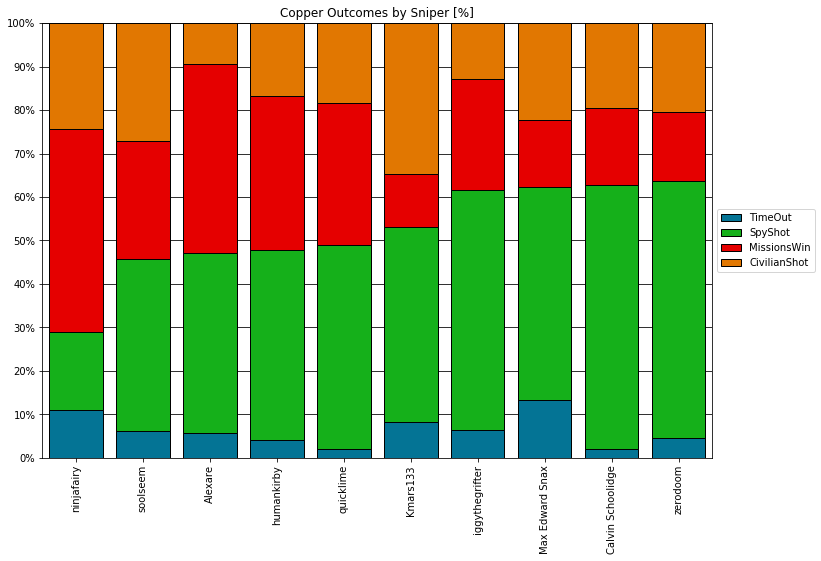

In [9]:
game_outcomes(
    div_replays,
    f"{division} Outcomes by Sniper",
    groupby=lambda g: g.sniper,
    counts_plot=False,
    category_data_order=sort_by_spy_wins,
    reversed_data_sort=True
)

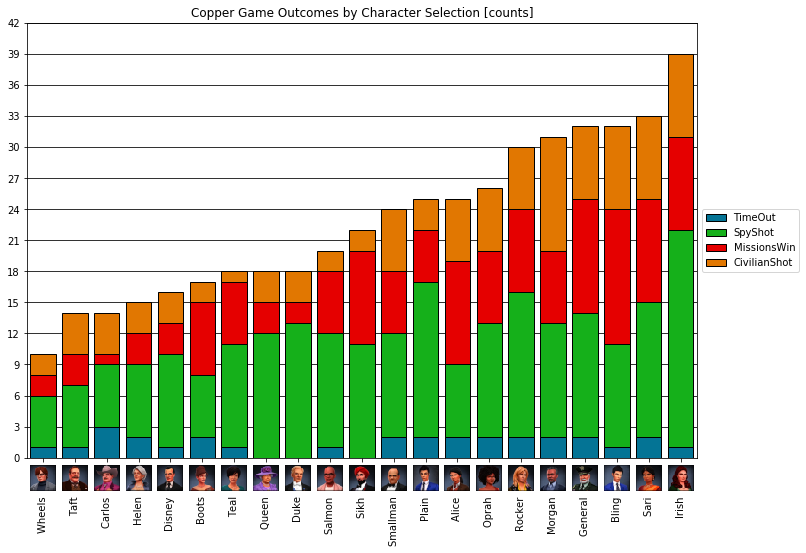

In [10]:
game_outcomes(
    div_replays,
    f"{division} Game Outcomes by Character Selection",
    groupby=lambda g: determine_character_in_role(g, Roles.Spy),
    category_data_order=sum,
    portrait_x_axis=True,
    reversed_data_sort=True,
    percentile_plot=False
)

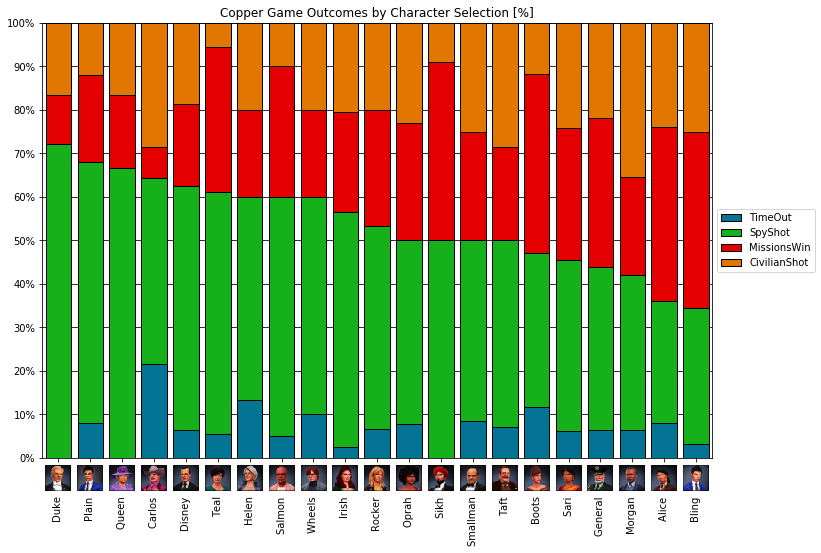

In [11]:
game_outcomes(
    div_replays,
    f"{division} Game Outcomes by Character Selection",
    groupby=lambda g: determine_character_in_role(g, Roles.Spy),
    category_data_order=sort_by_spy_wins,
    portrait_x_axis=True,
    counts_plot=False
)

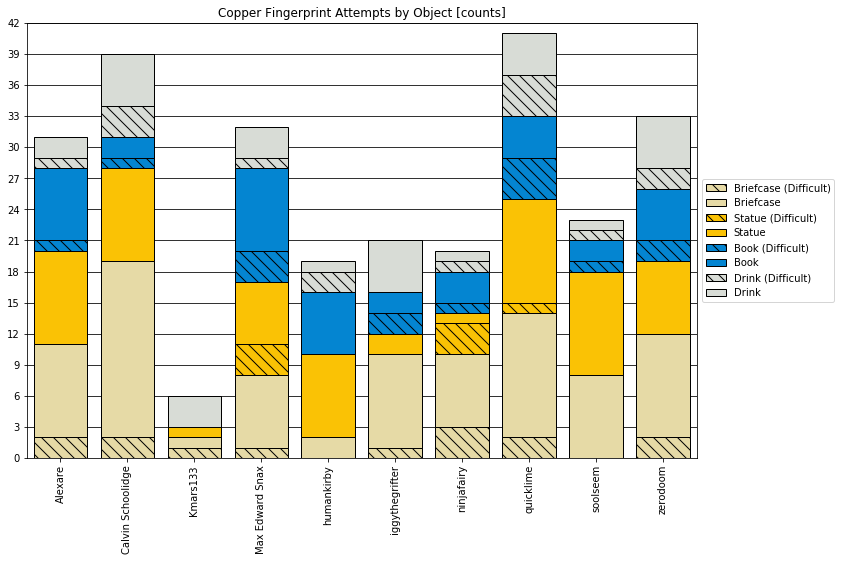

In [12]:
attempted_fingerprint_sources(
    div_replays,
    f"{division} Fingerprint Attempts by Object",
    groupby=lambda g: g.spy,
    percentile_plot=False
)

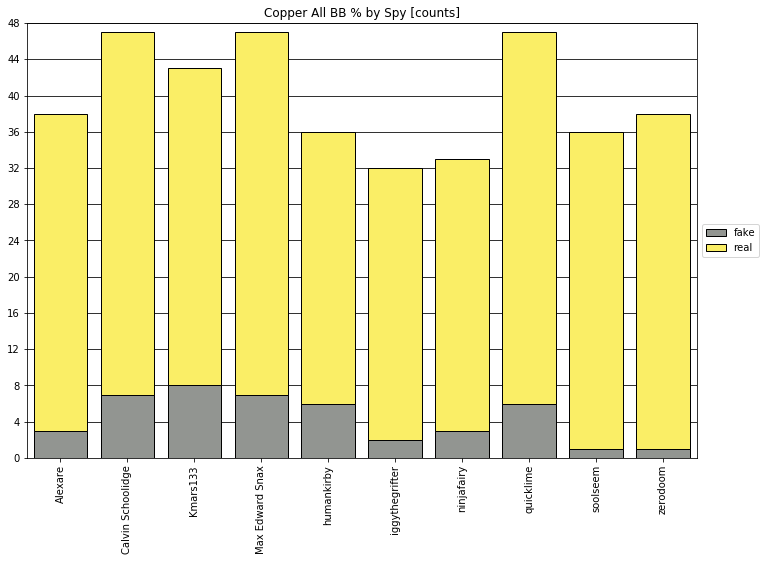

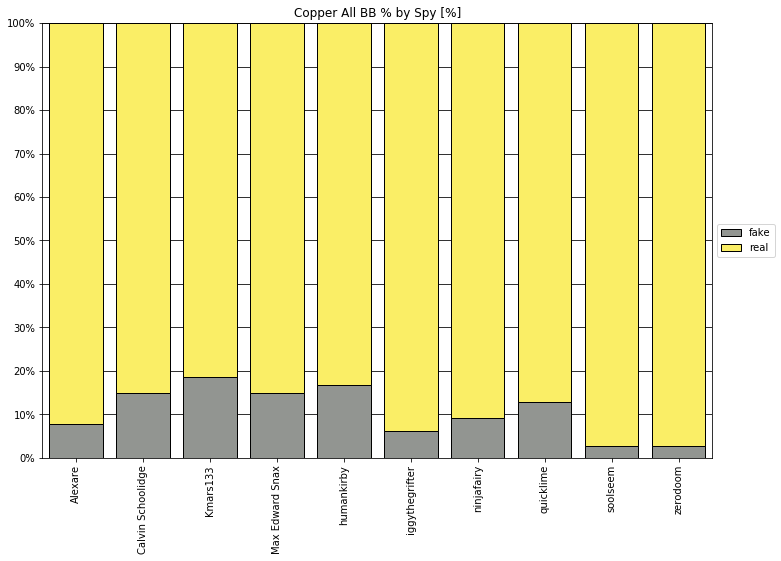

In [13]:
all_banana_bread_percentages(div_replays, f"{division} All BB % by Spy",
    groupby=lambda g: g.spy,
)

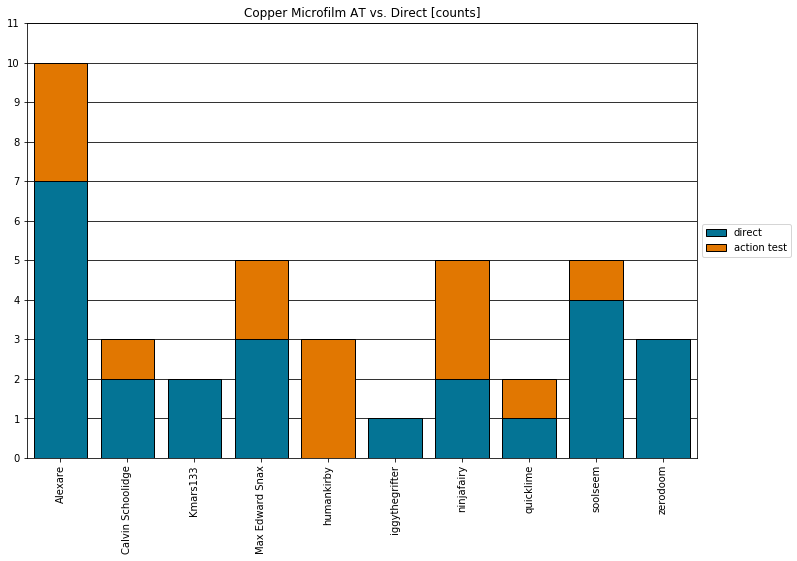

In [14]:
at_or_direct_mf(
    div_replays,
    f"{division} Microfilm AT vs. Direct",
    groupby=lambda g: g.spy,
    percentile_plot=False
)

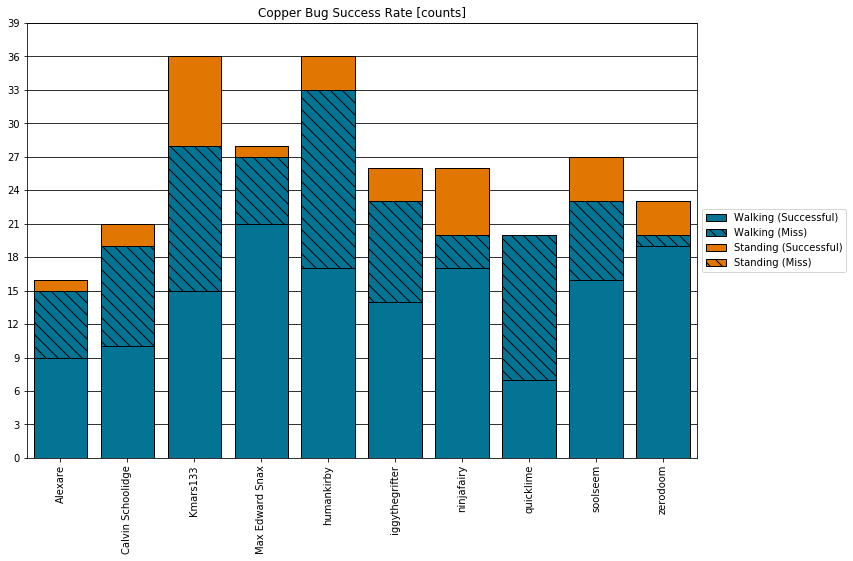

In [15]:
bug_success_rate(div_replays,
    f"{division} Bug Success Rate",
    groupby=lambda g: g.spy,
    percentile_plot=False
)

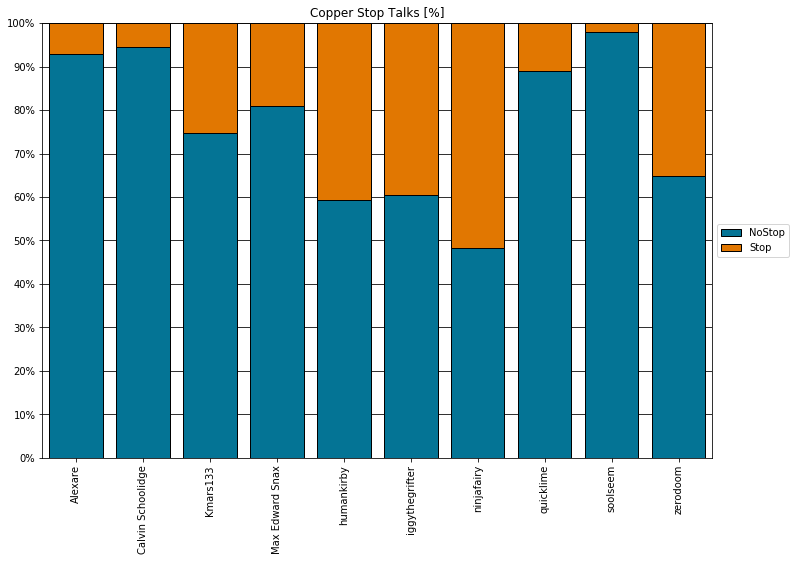

In [16]:
stop_talk_in_game_percentage(div_replays,
    f"{division} Stop Talks",
    groupby=lambda g: g.spy,
    counts_plot=False
)

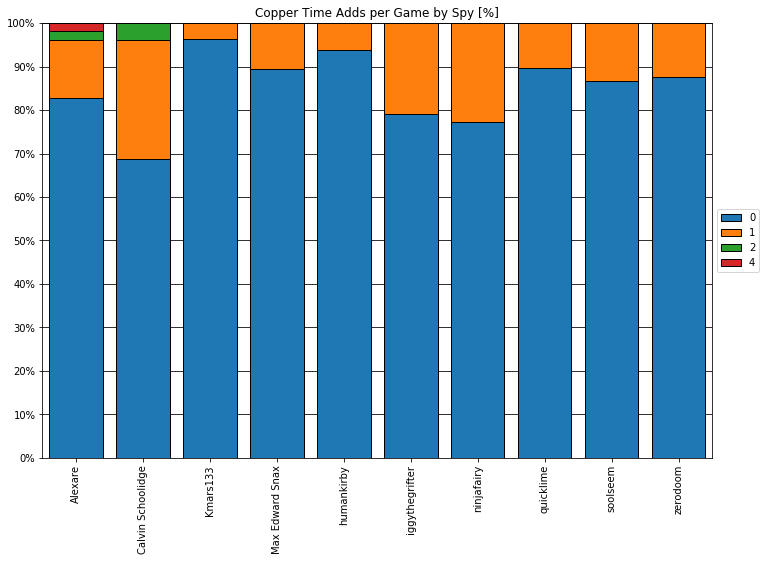

In [17]:
time_add_times_per_game(div_replays,
    f"{division} Time Adds per Game by Spy",
    groupby=lambda g: g.spy,
    counts_plot=False
)